# Clustering

## 1. Introducción teórica al clustering

Se conoce como clustering a las técnicas de machine learning que permiten identificar patrones o grupos (clusters) dentro de un conjunto de observaciones. Estas técnicas forman parte de los métodos no supervisados. Estas técnicas tambien reciben comunmente el nombre de segmentación.

Un ejemplo de utilización de estos algoritmos podría ser segmentar a los clientes de un banco en diferentes categorías, en base a información como edad, nómina, patrimonio, productos bancarios contratados...etc.

### 1.1. Distancias

A pesar de que el abánico de técnicas de clusterización es muy amplio, todos los métodos tienen un punto en común, y es que se necesita una medida de similitud entre observaciones que permita agrupar o no las observaciones del dataset.

Esta medida de similitud es lo que se conoce dentro del ámbito del clustering como distancia. Si llevamos cada observación a un espacio dimensional $k$, donde $k$ es cada una de las variables del modelo, las observaciones más similares se encontrarán más cerca dentro de este espacio. Es por esto que se denomina a este indicador de similitud, distancia.

Existen diferentes formas de calcular la distancia entre dos observaciones $x_i$ y $x_j$ en un espacio dimensional $k$:

**Distancia Euclidea:**

La distancia euclídea entre dos puntos $x_i$ y $x_j$ se define como la longitud del segmento que une ambos puntos. En coordenadas cartesianas, la distancia euclídea se calcula empleando el teorema de Pitágoras. Su fórmula es:

\begin{align}
D_1(x_i, x_j) =\sqrt{(x_{i1}-x_{j1})^2+(x_{i2}-x_{j2})^2+...+(x_{in}-x_{jn})^2}=\sqrt{\sum_{k=1}^{n} (x_{ik}-x_{jk})^2}
\end{align}

**Distancia Manhattan:**

La distancia de Manhattan, también conocida como taxicab metric, rectilinear distance o L1 distance, define la distancia entre dos puntos $x_i$ y $x_j$ como el sumatorio de las diferencias absolutas entre cada dimensión. Esta medida se ve menos afectada por outliers (es más robusta) que la distancia euclídea debido a que no eleva al cuadrado las diferencias. Su fórmula es:

\begin{align}
D_1(x_i, x_j) = |x_{i1}-x_{j1}|+|x_{i2}-x_{j2}|+...+|x_{in}-x_{jn}|=\sum_{k=1}^{n} |x_{ik}-x_{jk}|
\end{align}

**Distancia de Minkowski:**

La fórmula de la distancia de Minkowski tiene una estructura similar a la distancia euclidea, solo que en esta se puede definir un parámetro $p$ que cuanto más grande es, más minimiza la distancia entre las observaciones.

\begin{align}
D_1(x_i, x_j) =\sqrt[p]{(x_{i1}-x_{j1})^p+(x_{i2}-x_{j2})^p+...+(x_{in}-x_{jn})^p}=\sqrt[p]{\sum_{k=1}^{n} (x_{ik}-x_{jk})^p}
\end{align}

> *Para $p=1$ obtenemos la distancia de Manhattan, y para $p=2$ la distancia Euclidea.*

**Normalización de distancias:**

Dado que es posible que no todas las variables tengan el mismo rango, es necesario normalizar el dataset. Esto se debe a que en caso no hacerlo, aquellas variables que tengan valores muy altos pueden tener mucha más significancia (a nivel de distancia) que otras variables que tengan relevancia, sesgando el modelo y marcando la agrupación final.

Una de las formas de normalizar un dataset es aplicar a cada variable una normalización en base a su media y desviación estándar:

\begin{align}
x_i' = \frac{x_i-\mu}{\sigma}
\end{align}

### 1.2. Tipos de clustering

#### 1.2.1. Clustering jerárquico

El clustering jerárquico es un método de agrupación de observaciones en el que no es necesario definir el número de grupos final. Este algoritmo agrupa los datos basándose en la distancia entre cada uno y buscando que los datos que están dentro de un clúster sean los más similares entre sí.

En base a la estrategia seguida para crear los grupos, los algoritmos de clustering jerárquico se pueden dividir en dos grupos:

- Aglomerativos
- Divisivos

**Clustering aglomerativo (agglomerative clustering or bottom-up):** en este método cada observación empieza siendo un cluster independiente, y en cada iteración del algoritmo, se va buscando que puntos son los que tienen menor distancia (mayor similitud) entre ellos para ir agrupándolos en nuevos clusters. Este proceso se repite hasta que todas las observaciones convergen en un único cluster.

Para este método es necesario definir el tipo distancia y nexo (*linkage*) entre clusters. Las tipologías de *linkage* más frecuentes son:

- Máximo (*complete or maximum*): es la distancia entre los dos puntos más aldejados de dos clusters diferentes. Es la medida más conservadora.
- Mínimo (*single or minimum*): es la distancia entre los dos puntos más cercanos de dos clusters diferentes. Es la medida menos conservadora.
- Media (*average*): es la distancia media entre todos los pares de observaciones de dos clusters.
- Centroide (*centroid*): es la distancia entre los centroides de dos clusters.
- Ward: es un método cuyo objetivo es reducir la suma total de varianza intra-cluster.

Los tipo de *linkage* más utilizados son el *complete*, *average* y *Ward*, ya que son los que generan unos dendrogramas mas compensados y con clusters más definidos, aunque esta práctica no se puede generalizar y será necesario estudiar cada caso en particular para ver cual se adapta mejor.

**Clustering divisivo (divisive clustering or top-down):** al contrario que en el método anterior, en este caso se inicia el proceso con todas las observaciones formando parte de un único cluster, el cual se va dividiendo progresivamente en función de las distancias entre los nuevos clusteres que vayan surgiendo de cada iteración. Este proceso se repite hasta que cada observación forma un único cluster.

Al contrario en el caso aglomerativo, en este tipo de agrupación solo es necesario indicar el tipo de distancia a emplear. En cada iteración se buscará que ésta distancia sea máxima de modo que los clusters creados sean lo más diferentes posibles.

Este último algoritmo puede ser más preciso que el anterior, pero dado que tiene que ir subdiviendo cada vez más el dataset y las características del algoritmo, si no se parametriza bien, puede ser muy demandante desde el punto de vista computacional.

**Dendrograma:**

Una forma muy intuitiva de representar los métodos jerárquicos, es medianta una estructura de árbol que recibe el nombre de dendrograma.

Un dendrograma es un tipo de representación gráfica o diagrama de datos en forma de árbol que organiza los datos en subcategorías que se van dividiendo en otros hasta llegar al nivel de detalle deseado (asemejándose a las ramas de un árbol que se van dividiendo en otras sucesivamente). Este tipo de representación permite apreciar claramente las relaciones de agrupación entre los datos e incluso entre grupos de ellos aunque no las relaciones de similitud o cercanía entre categorías.

Una vez creado el dendrograma, hay que evaluar hasta qué punto su estructura refleja las distancias originales entre observaciones. Una forma de hacerlo es empleando el coeficiente de correlación entre las distancias *cophenetic* del dendrograma (altura de los nodos) y la matriz de distancias original. Cuanto más cercano es el valor a 1, mejor refleja el dendrograma la verdadera similitud entre las observaciones. Valores superiores a 0.75 suelen considerarse como buenos. Esta medida puede emplearse como criterio de ayuda para escoger entre los distintos métodos de linkage.

El dendrograma, también es un buen método gráfico para obtener de forma aproximada el número óptimo de clusters.

#### 1.2.2. Clustering k-means

El algoritmo k-means es otro método de clusterización no supervisado que agrupa observaciones de manera iterativa, en base al cálculo de los centroides de los clusters creados en cada paso, tratando de minimizar en cada uno de ellos la varianza intra-cluster. En este método es necesario indicar de antemano el número $k$ de agrupaciones final.

La varianza intra-cluster se define como la suma de distancias euclideas al cuadrado entre cada punto $x_i$ del cluster $C_k$, y su centroide $\mu_k$, entre el número total de puntos del cluster $|C_k|$:

\begin{align}
W(C_k) =\frac{1}{|C_k|} \sum_{x_i \in C_k} (x_i-\mu_k)^2
\end{align}

Desde el punto de vista matemático, también es necesario indicar que todos los puntos pertenecen a algún cluster, y que los clusters no pueden solaparse.

La forma de implementar este algoritmo es la siguiente:

1. Definir el número $k$ de clusters
2. Seleccionar de forma aleatoria $k$ observaciones a modo de centroides iniciales
3. Agrupar cada observación con su centroide más cercano
4. Para cada cluster creado, recalcular el centroide
5. Repetir los pasos 3 y 4 hasta que se alcance un número fijado de iteraciones, o no haya cambios en los clusters

Debido a que el algoritmo k-means está basado en gran medidad en la asignación aleatoria inicial de los centroides, se suele ejecutar el algoritmo en repetidas ocasiones (25-50) cada una con unos centroides iniciales diferentes, y se escoge aquella agrupación que tenga un valor menor de la varianza total.

Hay que indicar que este algoritmo es sensible a la presencia de outliers, por lo que se deben eliminar antes del proceso o por el contrario decantarse por una variación de este método denominada k-medoids (PAM).

#### 1.2.3. Clustering k-medoids

El algoritmo k-medoids es un método de clusterización muy similar al k-means, pero que gracias a una modificación, lo hace más robusto frente a datasets con outliers o ruido.

La diferencia principal entre ambos métodos es que mientras que el algoritmo k-means trabaja con los centroides de los clusters, lo cual es el promedio de todos los puntos pero sin ser ninguna de las observaciones; el algoritmo k-medoids trabaja con el medioide, que es el punto del cluster cuya distancia con el resto de puntos del cluster es la más baja.

Debido a que el algoritmo k-medoids fuerza a que el medioide del cluster sea un punto del dataset y no uno ficticio, hace que sea menos sensible a la presencia de valores extremos.

La varianza intra-cluster en este caso se define como la suma de distancias euclideas al cuadrado entre cada punto $x_i$ del cluster $C_k$, y su medioide $m_k$:

\begin{align}
W(C_k) =\frac{1}{|C_k|} \sum_{x_i \in C_k} (x_i-m_k)^2
\end{align}

La forma de implementar este algoritmo es la siguiente:

1. Definir el número $k$ de clusters
2. Seleccionar de forma aleatoria $k$ observaciones a modo de medioides iniciales
3. Agrupar cada observación con su medioide más cercano
4. Para cada cluster creado, recalcular el medioide
5. Repetir los pasos 3 y 4 hasta que se alcance un número fijado de iteraciones, o no haya cambios en los clusters

Una de las limitaciones del método k-medoids es que su algoritmo requiere mucha memoria RAM, lo que impide que se pueda aplicar cuando el set de datos contiene varios miles de observaciones. CLARA (Clustering Large Applications) es un método que combina la idea de k-medoids con el resampling para que pueda aplicarse a grandes volúmenes de datos.

#### 1.2.4. Clustering CLARA

Una de las limitaciones del método K-medoids-clustering es que su algoritmo requiere mucha memoria RAM, lo que impide que se pueda aplicar cuando el set de datos contiene varios miles de observaciones. CLARA (Clustering Large Applications) es un método que combina la idea de K-medoids con el resampling para que pueda aplicarse a grandes volúmenes de datos.

En lugar de intentar encontrar los medoids empleando todos los datos a la vez, CLARA selecciona una muestra aleatoria de un tamaño determinado y le aplica el algoritmo de PAM (K-medoids) para encontrar los clusters óptimos acorde a esa muestra. Utilizando esos medoids se agrupan las observaciones de todo el set de datos. La calidad de los medoids resultantes se cuantifica con la suma total de las distancias entre cada observación del set de datos y su correspondiente medoid (suma total de distancias intra-clusters). CLARA repite este proceso un número predeterminado de veces con el objetivo de reducir el bias de muestreo. Por último, se seleccionan como clusters finales los obtenidos con aquellos medoids que han conseguido menor suma total de distancias. A continuación, se describen los pasos del algoritmo CLARA.

La forma de implementar este algoritmo es la siguiente:

1. Dividir de forma aleatoria el dataset en $n$ partes iguales
2. Aplicar el método k-medoids (PAM) en uno de los sub-datasets
3. Agrupar el resto de observaciones del dataset, en base a los k-medoids obtenidos en el punto 2
4. Calcular la suma total de las distancias entre cada observación del set de datos y su correspondiente medoid
5. Repetir con todos los sub-dataset y elegir los medoids con menor suma total de distancias intra-cluster

#### 1.2.5. Clustering Propagación de la Afinidad

A diferencia de otros métodos de agrupación tradicionales, la Propagación de la Afinidad no requiere especificar el número $k$ de clusters antes de realizar el proceso. Este algoritmo esta basado en el concepto de pase de mensajes entre puntos del dataset.

En términos simples, este método se basa en que cada punto de datos envía mensajes a todos los demás puntos, informando a sus objetivos del atractivo relativo de cada objetivo para el remitente. Cada objetivo responde a todos los remitentes con una respuesta que informa a cada remitente de su disponibilidad para asociarse con el remitente, dado el atractivo de los mensajes que ha recibido de todos los demás remitentes. Los remitentes responden a los objetivos con mensajes que informan a cada objetivo del atractivo relativo revisado del objetivo para el remitente, dados los mensajes de disponibilidad que ha recibido de todos los objetivos. El procedimiento para pasar mensajes continúa hasta que se llega a un consenso. Una vez que el remitente está asociado con uno de sus objetivos, ese objetivo se convierte en el ejemplo del punto. Todos los puntos con el mismo ejemplar se colocan en el mismo cluster.



#### 1.2.3. Clustering basado en densidad

To be defined...

### 1.3. Número óptimo de clusters

Determinar el número óptimo de clusters es uno de los pasos más complicados a la hora de aplicar métodos de clustering, sobre todo cuando se trata de partitioning clustering, donde el número se tiene que especificar antes de poder ver los resultados. No existe una forma única de averiguar el número adecuado de clusters. Es un proceso bastante subjetivo que depende en gran medida del tipo de clustering empleado y de si se dispone de información previa sobre los datos con los que se está trabajando, por ejemplo, estudios anteriores pueden sugerir o acotar las posibilidades. A pesar de ello, se han desarrollado varias estrategias que ayudan en el proceso.

#### 1.3.1. Método del codo

El método del codo *(elbow method)* sigue una estrategia comúnmente empleada para encontrar el valor óptimo de un hiperparámetro. La idea general es probar un rango de valores del hiperparámetro en cuestión, representar gráficamente los resultados obtenidos con cada uno e identificar aquel punto de la curva a partir del cual la mejora deja de ser sustancial (principio de verosimilitud).

En el caso particular del clustering, el hiperparámetro se trata del número $k$ de clusters. Para implementar este método, se realiza una clusterización desde 1 hasta un número determinado de clusters, y para cada $k$, se obtiene el indicador WCSS (Within-Cluster-Sum-of-Squares) que es la suma de distancias euclideas al cuadrado entre el centroide del cluster y el resto de observaciones.

Cada WCSS se grafica en función de su $k$, y donde aparezca un punto de inflexión donde para cada incremento de $k$, la mejora del WCSS sea poco significativa (codo), se obtendrá el número óptimo de clusters del modelo.

#### 1.3.2. Método de la silueta

El método de la silueta *(average silhouette)* es muy similar al del codo, con la diferencia de que, en lugar minimizar el total inter-cluster sum of squares (wss), se maximiza la media de los silhouette coeficient o índices silueta $s_i$. Este coeficiente cuantifica cómo de buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores altos un indicativo de que la observación se ha asignado al cluster correcto.

Para cada observación $i$, el silhouette coeficient ($s_i$) se obtiene del siguiente modo:

- Calcular el promedio de las distancias (llámese $a_i$) entre la observación $i$ y el resto de observaciones que pertenecen al mismo cluster. Cuanto menor sea $a_i$, mejor ha sido la asignación de $i$ a su cluster.

- Calcular la distancia promedio entre la observación $i$ y el resto de clusters. Entendiendo por distancia promedio entre $i$ y un determinado cluster $C$ como la media de las distancias entre $i$ y las observaciones del cluster $C$.

- Identificar como $b_i$ a la menor de las distancias promedio entre $i$ y el resto de clusters, es decir, la distancia al cluster más próximo (neighbouring cluster).

Calcular el valor de silhouette como:

\begin{align}
s_i =\frac{b_1-a_1}{max(a_i,b_i)}
\end{align}

Los resultados de este método se interpretan de la siguiente forma:

- $s_i$ próximo a 1: $a_i>>b_i$ $\rightarrow$ el punto está muy bien clasificado
- $s_i$ próximo a -1: $a_i<<b_i$ $\rightarrow$ el punto estaría mejor en el cluster vecino

El promedio de $s_i$ de todos los puntos de un cluster, da información de cómo de bien agrupados están esas observaciones. 

En el caso del clustering jerárquico es necesario cortar el árbol para cada uno de los valores $k$ antes de calcular los índices silueta.

## 2. Clustering jerárquico

En este ejercico, se va a realizar un clustering de clientes de un centro comercial en base a algunas de las variables que vienen en el dataset. Para poder realizar un análisis mas visual, se va a prescindir de una de ellas, para trabajar en un entorno bidimensional.

In [33]:
## Importamos librerias
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")
%matplotlib inline

In [66]:
## Cargamos el fichero de trabajo
mainpath = "C:/Users/gmachin/Desktop/Developer/apuntes-notebooks/datasets"
filename = "/shopping-data/shopping-data.csv"
fullpath = mainpath + filename

df_shopping = pd.read_csv(fullpath)

df_shopping.head(3)

,CustomerID,Genre,Age,Annual_Income_k,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [9]:
df_shopping.shape

(200, 5)

El primer paso para realizar el clustering jerárquico, es definir como vamos a cuantificar la similitud entre los puntos y los clusters. El tipo de nexo a utilizar en el proceso, puede definirse mediante la función la función `linkage(input, method, metric)` de la librería `scipy.cluster.hierarchy`. En esta función podemos modificar los argumentos `method` y `metric` según se ha visto en la parte teórica:

Posibles valores para `method`:

- `complete`
- `single`
- `average`
- `centroid`
- `ward`

Posibles valores para `metric`:

- `cityblock`
- `euclidean`
- `minkowski`

Una vez se ha definido el *linkage*, podemos gradicar el dendrograma mediante la función `dendrogram(linkage)`, de la librería `scipy.cluster.hierarchy`.

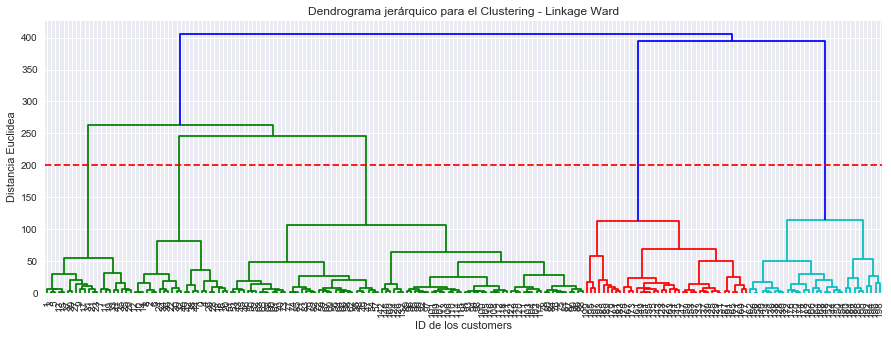

In [64]:
## Nos quedamos solo con aquellas variables con información relativas a los ingresos y al score
shopping = df_shopping[['Annual_Income_k', 'Spending_Score']]

## Definimos el tipo de linkage (Ward), la distancia por defecto es la Euclidea 
z = linkage(shopping, 'ward')

## Graficamos el dendrograma
plt.figure(figsize = (15, 5))
plt.title("Dendrograma jerárquico para el Clustering - Linkage Ward")
plt.xlabel("ID de los customers")
plt.ylabel("Distancia Euclidea")
dendrogram(z, leaf_rotation = 90., leaf_font_size = 10.0)
plt.axhline(y = 200, color='r', linestyle='--')                         ## Cortamos del dendograma graficamente
plt.show()

Mediante la funcion `cophenet(linkage, pdist(input))`, podemos obtener un indicador de cómo el dendrograma refleja la distancia real entre observaciones.

In [44]:
c, coph_dists = cophenet(z, pdist(shopping))
c

0.7179298392392908

Una vez se tiene el dendrograma de todas las observaciones, es posible hallar de forma visual el número óptimo de clusters. Para ello se busca la agrupación de clusters que tenga mayor distancia entre el final y la unión de sus ramas (rojo y cyan), y se traza una línea horizontal de modo que cruce el mayor número de ramas, en este caso, obtendríamos 5 clusters.

Una vez se ha definido el número de clusters, podemos agrupar las observaciones en base a esto mediante la función `AgglomerativeClustering` de `scikit-learn`.

In [11]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')  
cluster.fit_predict(shopping)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

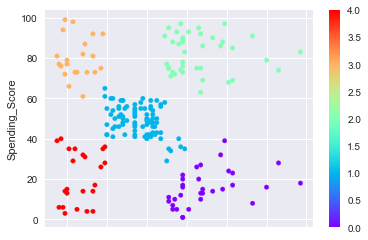

In [36]:
shopping.plot(kind = "scatter",
              x = "Annual_Income_k",
              y = "Spending_Score",
              c = cluster.labels_,
              cmap = 'rainbow')

Por último podemos anezar la información de a que cluster pertenece cada observación, al fichero inicial de modo que tengamos en una única tabla toda la información.

In [61]:
## Creamos un dataframe con los resultados de la clusterizacion
labels = cluster.labels_
df_labels = pd.DataFrame(labels, columns = ["cluster"])

## Concatenamos los ficheros horizontalmente, uno al lado del otro
df_shopping_cluster = pd.concat([df_shopping, df_labels], axis = 1)
df_shopping_cluster.head(3)

,CustomerID,Genre,Age,Annual_Income_k,Spending_Score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4


## 3. Clustering k-means

Para realizar este ejercicio se va a utilizar el mismo dataset que en el clustering jerárquico, y se va a tratar de llegar al mismo resultado pero mediante el algoritmo k-means.

Para utilizar este algoritmo es necesario importar la función `KMeans` de la librería `sklearn.cluster`.

In [1]:
## Importamos librerias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")
%matplotlib inline

In [2]:
## Cargamos el fichero de trabajo
mainpath = "C:/Users/gmachin/Desktop/Developer/apuntes-notebooks/datasets"
filename = "/shopping-data/shopping-data.csv"
fullpath = mainpath + filename

df_shopping = pd.read_csv(fullpath)

## Nos quedamos solo con aquellas variables con información relativas a los ingresos y al score
X = df_shopping[['Annual_Income_k', 'Spending_Score']].values

**Definir el número de clusters $k$:**

A diferencia de los métodos jerárquicos, en este algoritmo es necesario indicar primero el número de clusters en el que se quiere segmentar el dataset, para ello, se puede utilizar el método del codo:

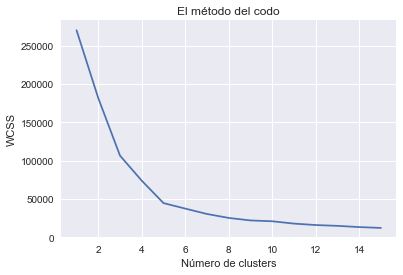

In [114]:
## Definimos un array vacío donde iremos incluyendo todas las inercias del método
wcss = []

## Obtenemos la incercia del modelo para los valores de k de 1 a 10.
for i in range(1,16):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',      ## Realiza un estudio preliminar para definir los mejores centroides iniciales
                    max_iter = 300,          ## Número máximo de iteraciones del proceso
                    n_init = 10,             ## Número de veces que se repite el algoritmo con centroides iniciales diferentes
                    random_state = 0)        ## Semilla

    ## Ajustamos el algoritmo al dataset
    kmeans.fit(X)

    ## Apendeamos todas las inercias en el array inicial
    wcss.append(kmeans.inertia_)             ## inertia_: sum of squared distances of samples to their closest cluster center


## Graficamos el método del codo
plt.plot(range(1,16), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Observamos que el cambio más significativo en el WCSS se produce en el número 5, por lo que definiremos éste número como el valor de $k$.

Y también podemos valernos del método de la silueta para contrastar el modelo anterior. Dentro de la librería `scikit-learn.metrics`, podremos valernos de la función `silhouette_score(input, .labels_)` para obtener este coeficiente:

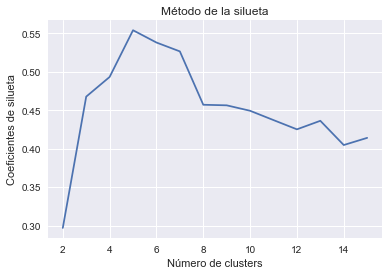

In [29]:
## Definimos un array vacío donde iremos incluyendo todas los coeficientes de silueta del método
silhouette_coef = []

## Obtenemos los coeficientes de silueta del modelo para los valores de k de 2 a 10 (No existe Ci para k = 1)
for i in range(2,16):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',      ## Realiza un estudio preliminar para definir los mejores centroides iniciales
                    max_iter = 300,          ## Número máximo de iteraciones del proceso
                    n_init = 10,             ## Número de veces que se repite el algoritmo con centroides iniciales diferentes
                    random_state = 0)        ## Semilla

    ## Ajustamos el algoritmo al dataset
    kmeans.fit(X)

    ## Apendeamos todos los coeficiente de silueta en el array inicial
    silhouette_coef.append(silhouette_score(X, kmeans.labels_))


## Graficamos el método de la silueta
plt.plot(range(2,16), silhouette_coef)
plt.title('Método de la silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficientes de silueta')
plt.show()

Al igual que mediante el método del codo, observamos que el mejor coeficiente de silueta se obtiene para un número de clusters $k=5$.

**Ajuste del modelo k-means:**

In [109]:
kmeans = KMeans(n_clusters = 5,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)

y_kmeans = kmeans.fit_predict(X)

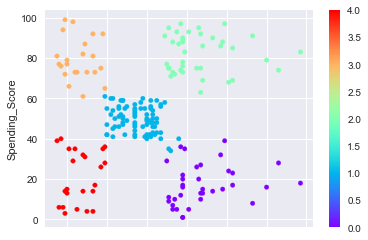

In [110]:
shopping.plot(kind = "scatter",
              x = "Annual_Income_k",
              y = "Spending_Score",
              c = kmeans.labels_,
              cmap = 'rainbow')

Observando los gráficos obtenidos por el método jerárquico y k-means y comparando, se puede apreciar que los clusters son muy similares. Es cierto que existe alguna transferencia de puntos entre los colores cyan, morado y naranja, pero es muy leve.

In [112]:
## Creamos un dataframe con los resultados de la clusterizacion
labels = kmeans.labels_
df_labels = pd.DataFrame(labels, columns = ["cluster"])

## Concatenamos los ficheros horizontalmente, uno al lado del otro
df_shopping_cluster = pd.concat([df_shopping, df_labels], axis = 1)
df_shopping_cluster.head(3)

,CustomerID,Genre,Age,Annual_Income_k,Spending_Score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4


In [ ]:
## Atributos del método KMeans de scikit-learn
kmeans.cluster_centers_        ## Centroides
kmeans.labels_                 ## Cluster de cada punto 
kmeans.inertia_                ## sum of squared distances of samples to their closest cluster center
kmeans.n_iter_                 ## número de iteraciones que han sido necesarias para converger